In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_yds_comp_salary_17-18')

In [3]:
qbs.dtypes

NAME              object
YDS/COMP         float64
YDS/COMP_rank    float64
salary             int64
dtype: object

In [4]:
qbs.head()

,NAME,YDS/COMP,YDS/COMP_rank,salary
0,Deshaun Watson,13.5,1.0,3463570
1,Patrick Mahomes,12.9,3.5,4106447
2,Jared Goff,12.9,3.5,6984418
3,Philip Rivers,12.5,5.0,20812500
4,Carson Wentz,12.4,6.5,6669085


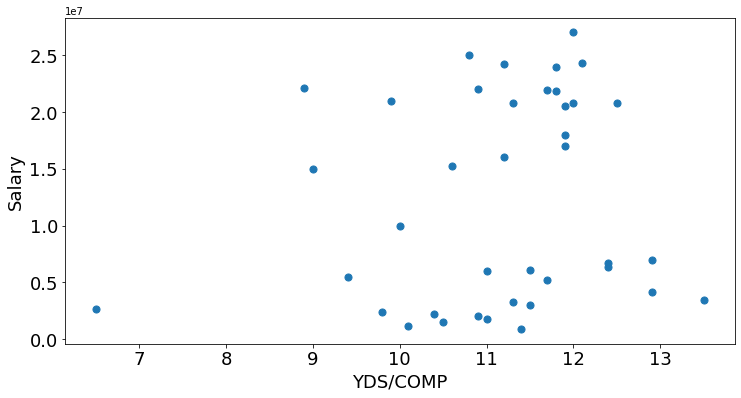

In [5]:
ax = qbs.plot(kind="scatter", x = 'YDS/COMP',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/COMP', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['YDS/COMP', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 1.85606516e-15, -1.13869028e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.13878492,  0.49498871],
       [-0.25981404, -1.02534715],
       [ 0.40970675,  1.04901971],
       [ 1.30866333, -0.75938787],
       [-3.61741086, -1.08378699]])

In [11]:
km.predict(X)

array([3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 4], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,YDS/COMP,YDS/COMP_rank,salary,clusters
0,Deshaun Watson,13.5,1.0,3463570,3
1,Patrick Mahomes,12.9,3.5,4106447,3
2,Jared Goff,12.9,3.5,6984418,3
3,Philip Rivers,12.5,5.0,20812500,2
4,Carson Wentz,12.4,6.5,6669085,3


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[9.68000000e+00, 1.66766666e+07],
       [1.08076923e+01, 3.14513546e+06],
       [1.16666667e+01, 2.16077400e+07],
       [1.28200000e+01, 5.51226780e+06],
       [6.50000000e+00, 2.62500000e+06]])

In [14]:
qbs.groupby('clusters')[['YDS/COMP', 'salary']].mean()

,YDS/COMP,salary
clusters,,
0,9.680000,1.667667e+07
1,10.807692,3.145135e+06
2,11.666667,2.160774e+07
3,12.820000,5.512268e+06
4,6.500000,2.625000e+06


In [15]:
centroids = qbs.groupby('clusters')[['YDS/COMP', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

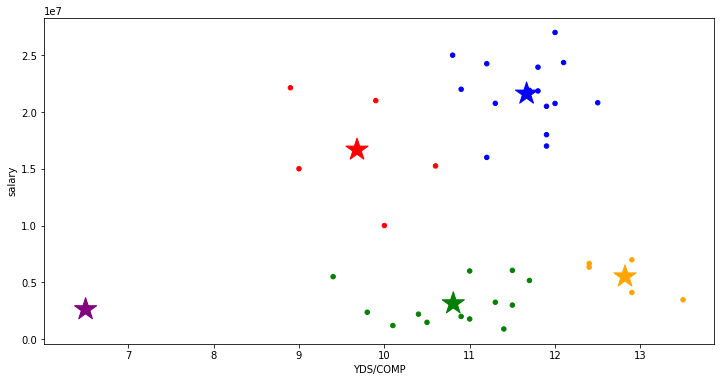

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'YDS/COMP', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/COMP', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

11.014720370502674

In [18]:
silhouette_score(X, km.labels_)

0.5029509927292578